# Regressao Linear - Açudes da Paraíba
## Açude de Boqueirão - Com Recarga do Rio São Francisco (Abril/2017)
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531

### Acude de Boqueirão com Recarga do Rio São Francisco - 03/05/2017 ate 01/05/2018

In [8]:
import pandas as pd

In [9]:
# leitura do dataset
# Acude de Boqueirão com Recarga do Rio São Francisco - 03/05/2017 ate 01/05/2018
df = pd.read_excel("Boqueirao-2017-2018.xlsx")
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,Epitácio Pessoa,20/04/2017,2.92,12033034.63,58974.26
1,Epitácio Pessoa,21/04/2017,2.94,12121496.02,88461.39
2,Epitácio Pessoa,22/04/2017,2.98,12268931.67,147435.65
3,Epitácio Pessoa,23/04/2017,3.02,12445854.45,176922.78
4,Epitácio Pessoa,24/04/2017,3.08,12681751.49,235897.04


In [10]:
del df["Açude"]
df.head()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,20/04/2017,2.92,12033034.63,58974.26
1,21/04/2017,2.94,12121496.02,88461.39
2,22/04/2017,2.98,12268931.67,147435.65
3,23/04/2017,3.02,12445854.45,176922.78
4,24/04/2017,3.08,12681751.49,235897.04


In [11]:
df.tail()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
374,30/04/2018,35.13,1.446395e+08,0.00
375,01/05/2018,35.40,1.457439e+08,1104342.24
376,02/05/2018,35.58,1.464801e+08,736228.16
377,03/05/2018,35.63,1.466641e+08,184057.04
378,04/05/2018,35.67,1.468482e+08,184057.04


In [12]:
len(df)

379

In [13]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,2017-04-20,2.92,12033034.63,58974.26
1,2017-04-21,2.94,12121496.02,88461.39
2,2017-04-22,2.98,12268931.67,147435.65
3,2017-04-23,3.02,12445854.45,176922.78
4,2017-04-24,3.08,12681751.49,235897.04


In [14]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
del df2['Data do registro']
df2.head()

,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,
2017-04-20,2.92,12033034.63,58974.26
2017-04-21,2.94,12121496.02,88461.39
2017-04-22,2.98,12268931.67,147435.65
2017-04-23,3.02,12445854.45,176922.78
2017-04-24,3.08,12681751.49,235897.04


In [15]:
#del df2["Data do registro"]
df2.describe()["Volume (%)"]

count    379.000000
mean      10.493404
std        6.468186
min        2.920000
25%        7.535000
50%        9.240000
75%       10.220000
max       35.670000
Name: Volume (%), dtype: float64

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 2017-04-20 to 2018-05-04
Data columns (total 3 columns):
Volume (%)     379 non-null float64
Volume (m³)    379 non-null float64
Aporte (m²)    379 non-null float64
dtypes: float64(3)
memory usage: 11.8 KB


In [17]:
df2.head()

,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,
2017-04-20,2.92,12033034.63,58974.26
2017-04-21,2.94,12121496.02,88461.39
2017-04-22,2.98,12268931.67,147435.65
2017-04-23,3.02,12445854.45,176922.78
2017-04-24,3.08,12681751.49,235897.04


## Plota dados do açude de Boqueirão - 20/04/2017 ate 04/05/2018

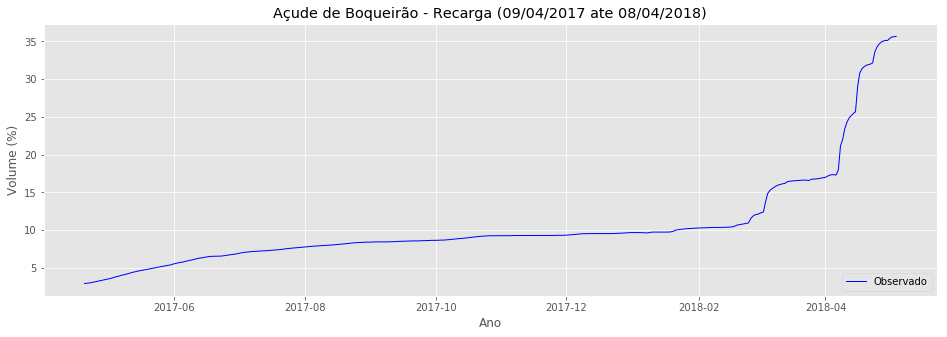

In [18]:
import matplotlib, matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,5))
matplotlib.style.use("ggplot")

plt.plot(df2["Volume (%)"], color='blue', linewidth=1)
# adcionando textos
plt.title("Açude de Boqueirão - Recarga (09/04/2017 ate 08/04/2018)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Observado"], loc="lower right")
plt.show()

In [19]:
# criar uma coluna com os dias
df3 = df2
numero_de_dias_observados = len(df3)
df3["dia"] = range(1,numero_de_dias_observados+1)
df3.head()

,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,
2017-04-20,2.92,12033034.63,58974.26,1
2017-04-21,2.94,12121496.02,88461.39,2
2017-04-22,2.98,12268931.67,147435.65,3
2017-04-23,3.02,12445854.45,176922.78,4
2017-04-24,3.08,12681751.49,235897.04,5


In [20]:
print("numero_de_dias_observados = ",len(df3)) # numero de tuplas ou linhas ou medições

numero_de_dias_observados =  379


In [21]:
df3.tail()

,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,
2018-04-30,35.13,1.446395e+08,0.00,375
2018-05-01,35.40,1.457439e+08,1104342.24,376
2018-05-02,35.58,1.464801e+08,736228.16,377
2018-05-03,35.63,1.466641e+08,184057.04,378
2018-05-04,35.67,1.468482e+08,184057.04,379


## Preparar os dados para aplicar o modelo de regressao

In [22]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')
#X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
X = df3['dia'].values.reshape(-1, 1)
y = df3['Volume (%)']

print(X[:3])
print(y[:3])

[[1]
 [2]
 [3]]
Data do registro
2017-04-20    2.92
2017-04-21    2.94
2017-04-22    2.98
Name: Volume (%), dtype: float64


## Aplicar o modelo de Regressao

In [23]:
# Aplicar o modelo de Regressao
olm = lm.LinearRegression()
olm.fit(X, y)
olm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Métrica para avaliar o modelo
R² - coeficiente de determinação. <br />
É uma métrica que mede os o quanto dos futuros examplos são previstos corretamente. <br />
Varia entre 1 e -1. Quanto mais o R² se aproximar de 1 ou -1, melhor a previsão. <br />
Um R² próximo de 0, não reflete o modelo

In [24]:
from sklearn.metrics import r2_score

y_pred = olm.predict(df3['dia'].values.reshape(-1, 1))
# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.5806021874539069


## Plota os Dados Observados e Previstos

### preparando a saida para plotar

In [25]:
# a reta de regressao
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.04498845398456564 * x + 1.9455974368639257


reta de regressão
 y = 0.04498845398456564 * x + 1.9455974368639257


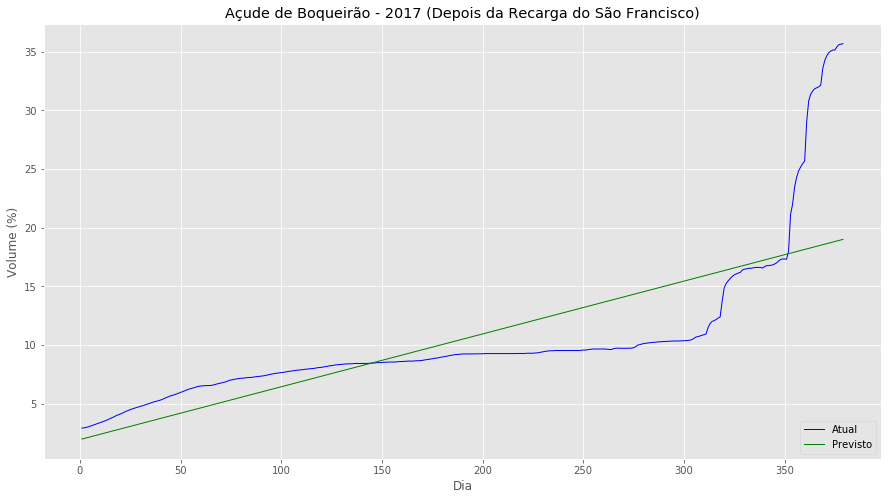

In [26]:
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,8))

# Plot both data sets
plt.plot(X, y, color='blue',
         linewidth=1)
plt.plot(X, olm.predict(X), color='green',
         linewidth=1)

# Add decorations
plt.title("Açude de Boqueirão - 2017 (Depois da Recarga do São Francisco)")
plt.xlabel("Dia")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto",], loc="lower right")
print('reta de regressão')
print(' y = {0} * x + {1}'.format(a, b))
plt.show()

In [27]:
list(olm.predict(X))[:3]

[1.9905858908484915, 2.035574344833057, 2.0805627988176227]

In [28]:
import numpy as np

In [29]:
numero_de_dias_observados

379

In [30]:
dados3meses = np.array(numero_de_dias_observados + 90)
dados3meses

array(469)

In [31]:
olm.predict(dados3meses)[0]

23.045182355625215

In [32]:
# predicao para 1 ano
dados = np.array(numero_de_dias_observados + 365)
pred = olm.predict(dados)[0] 
print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

Volume Boqueirão depois de um ano =  35.42 %


In [33]:
# predicao para 2 anos
dados = np.array((numero_de_dias_observados+365)*2).reshape(1, -1)
pred = olm.predict(dados)[0]  

print ("Volume Boqueirão depois de dois anos = %6.2f %%" % (pred))

Volume Boqueirão depois de dois anos =  68.89 %


In [34]:
# predicao até verter água-sangrar
ano=2018
print ("Volume Boqueirão: Ano %d -> %-5.2f%%" % (ano,olm.predict(numero_de_dias_observados)))
dia = 1
while (True):
    x = np.array([(numero_de_dias_observados + dia)]).reshape(1, -1)
    pred = olm.predict(x)[0]  
    if pred >= 100:
        break
    if dia % 365 == 0:
        ano = ano +  1
        print ("Volume Boqueirão: Ano %d -> %-5.2f%%" % (ano,pred))
    dia = dia + 1
print ("Volume Boqueirão: Ano %d -> %-5.2f%%" % (ano,pred))

Volume Boqueirão: Ano 2018 -> 19.00%
Volume Boqueirão: Ano 2019 -> 35.42%
Volume Boqueirão: Ano 2020 -> 51.84%
Volume Boqueirão: Ano 2021 -> 68.26%
Volume Boqueirão: Ano 2022 -> 84.68%
Volume Boqueirão: Ano 2022 -> 100.02%


### Com os dados de recarga do São Francisco e dados de chuva, representados pelo Volume diário, <br /> O Açude de Boqueirão encherá em 4 anos (2022)

---